In [58]:
import tensorflow
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [59]:
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [60]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
print(train_Y.size)
print(train_Y[0])

60000
5


In [72]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print(train_Y_one_hot.shape)

(60000, 10)


In [62]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [63]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
with tensorflow.device('/cpu:0'):
    history = model.fit(train_X, train_Y, batch_size=32, validation_split=0.2,epochs=20, callbacks=tensorboard_callback)

Epoch 1/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0207 - val_accuracy: 0.9943
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0209 - accuracy: 0.9928 - val_loss: 0.0230 - val_accuracy: 0.9944
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0223 - val_accuracy: 0.9942
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0245 - val_accuracy: 0.9947
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0242 - val_accuracy: 0.9945
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0270 - val_accuracy: 0.9940
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0301 - val_ac

In [75]:
with tensorflow.device('/cpu:0'):
    model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9920


In [79]:
model.save('./model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model/assets


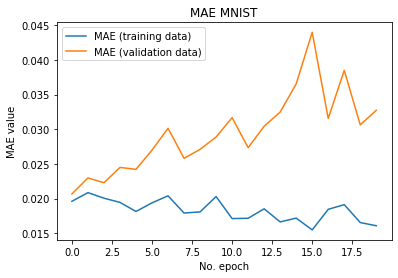

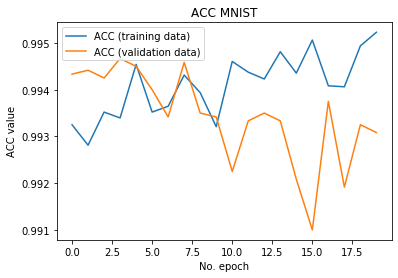

In [84]:
# Plot history: MAE: Mean Absolute Error
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE MNIST')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plot history: ACC: MAccuracy
plt.plot(history.history['accuracy'], label='ACC (training data)')
plt.plot(history.history['val_accuracy'], label='ACC (validation data)')
plt.title('ACC MNIST')
plt.ylabel('ACC value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()